In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)

### Read dataset

In [5]:
dataset = pd.read_excel('dataset.xlsx',index_col=0)
dataset

,action_type,Product,store
ID,,,
1,favorite,Tomato,BIM
2,view,Pepsi,spinneys
3,view,NaN,carrefour
4,view,Shampoo,spinneys
5,NaN,Shampoo,carrefour
...,...,...,...
96,favorite,gorilla glue,carrefour
97,NaN,Indomie khodar,awlad ragab
98,favorite,NaN,BIM


### Use *(only one)* pandas function to get a better description of the dataset


#### Note: To get a better description you need to get the following:
#### - Row count for each column
#### - Number of unique values for each column
#### - The most frequent value for each column
#### - The frequency of the most frequent value for each column

In [8]:
dataset.describe()

,action_type,Product,store
count,92,92,91
unique,2,13,10
top,view,Pepsi,BIM
freq,62,14,18


### What did you notice after seeing that row counts for each column are not equal ?


In [9]:
# Answer: <WRITE YOU ANSWER HERE>

### Get the number of NaNs for each column

In [10]:
np.sum(dataset.isnull())

action_type    8
Product        8
store          9
dtype: int64

### The values of this dataset are categorial, how to fill NaNs in categorial dataset ?

In [ ]:
# Answer: <WRITE YOU ANSWER HERE>

### Replace NaNs with the approche mentioned in your answer above
#### - You can loop on columns

In [21]:
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mode()[0],inplace=True)
    

### Create a dataframe that has the following three columns:
#### - Product name
#### - Number of views
#### - Number of favorites


In [40]:
df_product_views = pd.DataFrame(dataset[dataset['action_type'] == 'view']['Product'].value_counts())
df_product_views['favorites'] = dataset[dataset['action_type'] == 'favorite']['Product'].value_counts()
df_product_views = df_product_views.reset_index().rename(columns={'index':'product','Product':'views'})
df_product_views.fillna(0,inplace=True)
df_product_views

,product,views,favorites
0,Pepsi,14,8.0
1,Domty al-sandwich,7,1.0
2,7up,7,3.0
3,tide pods,6,1.0
4,Sprite cranberry,6,5.0
5,Potato,6,2.0
6,gorilla glue,6,2.0
7,Indomie khodar,5,2.0
8,Shampoo,3,0.0
9,Flex tape,3,1.0


### Plot *(in one figue)* products (sorted from highest view to lowest) with its number of views and favorites
#### The figure should exactly look like this (with title & x-axis and y-axis labels):
<img src="plot.png">

In [43]:
tidy_df = df_product_views.melt(id_vars='product').rename(columns=str.title)
tidy_df

,Product,Variable,Value
0,Pepsi,views,14.0
1,Domty al-sandwich,views,7.0
2,7up,views,7.0
3,tide pods,views,6.0
4,Sprite cranberry,views,6.0
5,Potato,views,6.0
6,gorilla glue,views,6.0
7,Indomie khodar,views,5.0
8,Shampoo,views,3.0
9,Flex tape,views,3.0


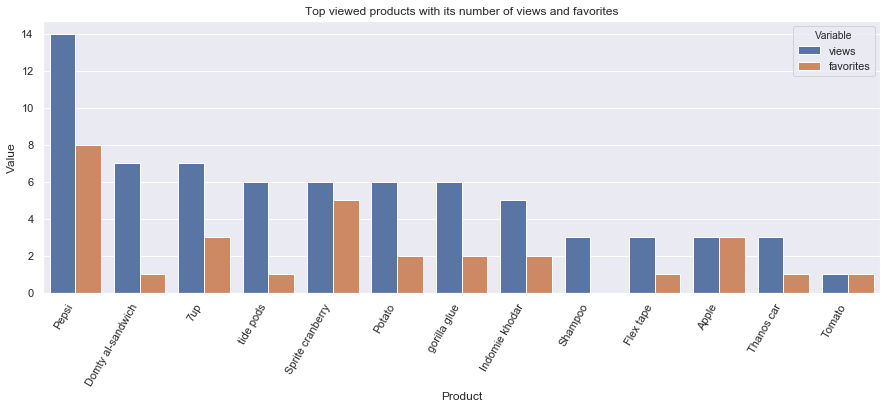

In [57]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Product', y='Value', hue='Variable', data=tidy_df)
_= ax.set_xticklabels(ax.get_xticklabels(), rotation=60 , ha="right")
_= plt.title("Top viewed products with its number of views and favorites")
_= plt.xlabel("Product")
ax.get_figure().savefig("plot.png")